In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from xgboost import XGBRegressor, XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve, r2_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [3]:
cancer_data= pd.read_csv('cancer.csv', index_col='Id')
cancer_data.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [4]:
cancer_data = pd.read_csv('cancer.csv', index_col='Id')
cancer_data['Diagnosis'] = cancer_data['Diagnosis'].map({'B': 0, 'M': 1})
X = cancer_data.drop(columns=['Diagnosis'])
y = cancer_data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cancer_data.shape

(569, 31)

# the relation between feature

Calculating R² values for all feature pairs...

R² Matrix (Feature X predicting Feature Y):
                          Radius (worst)  Texture (mean)  Compactness (worst)  \
Radius (worst)                    1.0000          0.1243               0.2264   
Texture (mean)                    0.1243          1.0000               0.0772   
Compactness (worst)               0.2264          0.0772               1.0000   
Symmetry (mean)                   0.0345          0.0051               0.2239   
Fractal dimension (mean)          0.0644          0.0058               0.2105   
Smoothness (mean)                 0.0454          0.0005               0.2232   

                          Symmetry (mean)  Fractal dimension (mean)  \
Radius (worst)                     0.0345                    0.0644   
Texture (mean)                     0.0051                    0.0058   
Compactness (worst)                0.2239                    0.2105   
Symmetry (mean)                    1.0000               

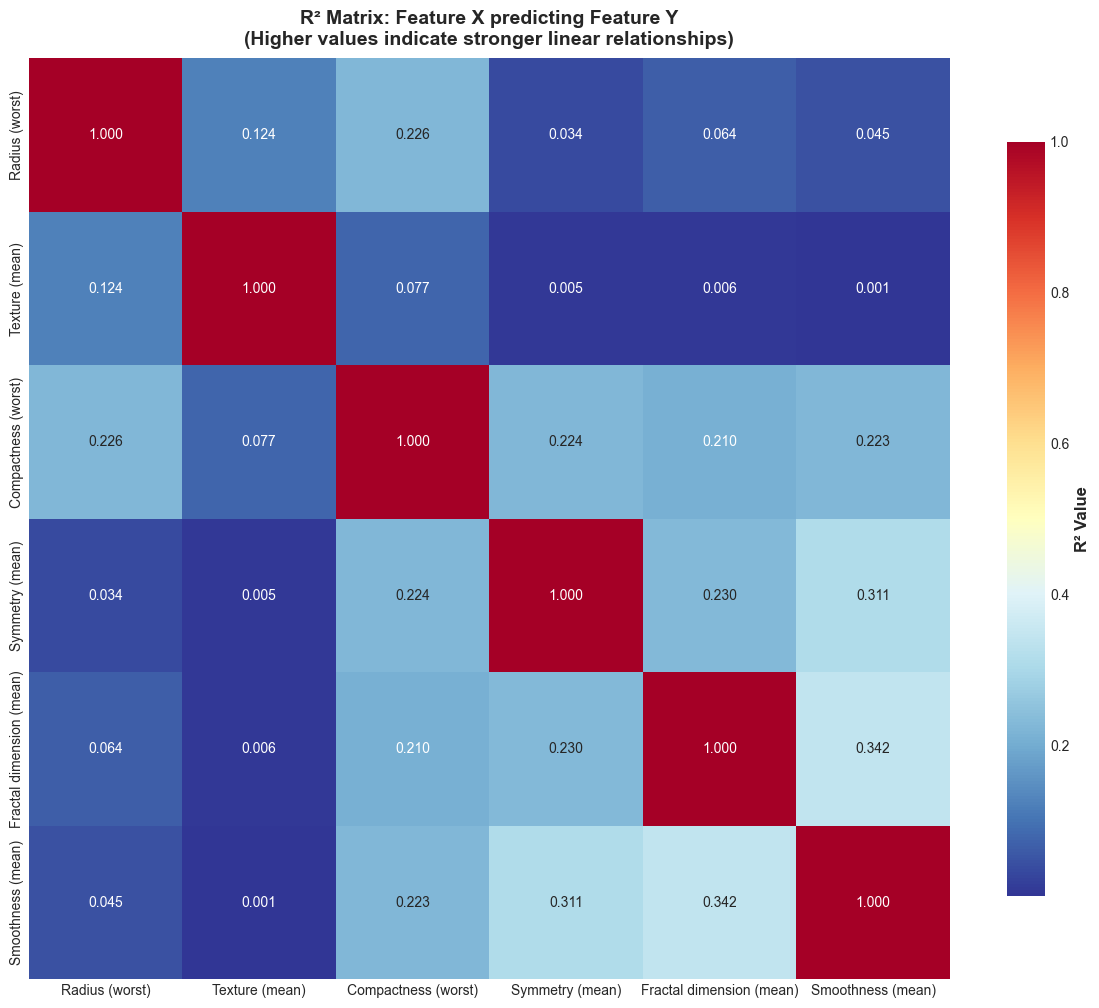


Creating scatter plots for top 3 highest R² pairs...


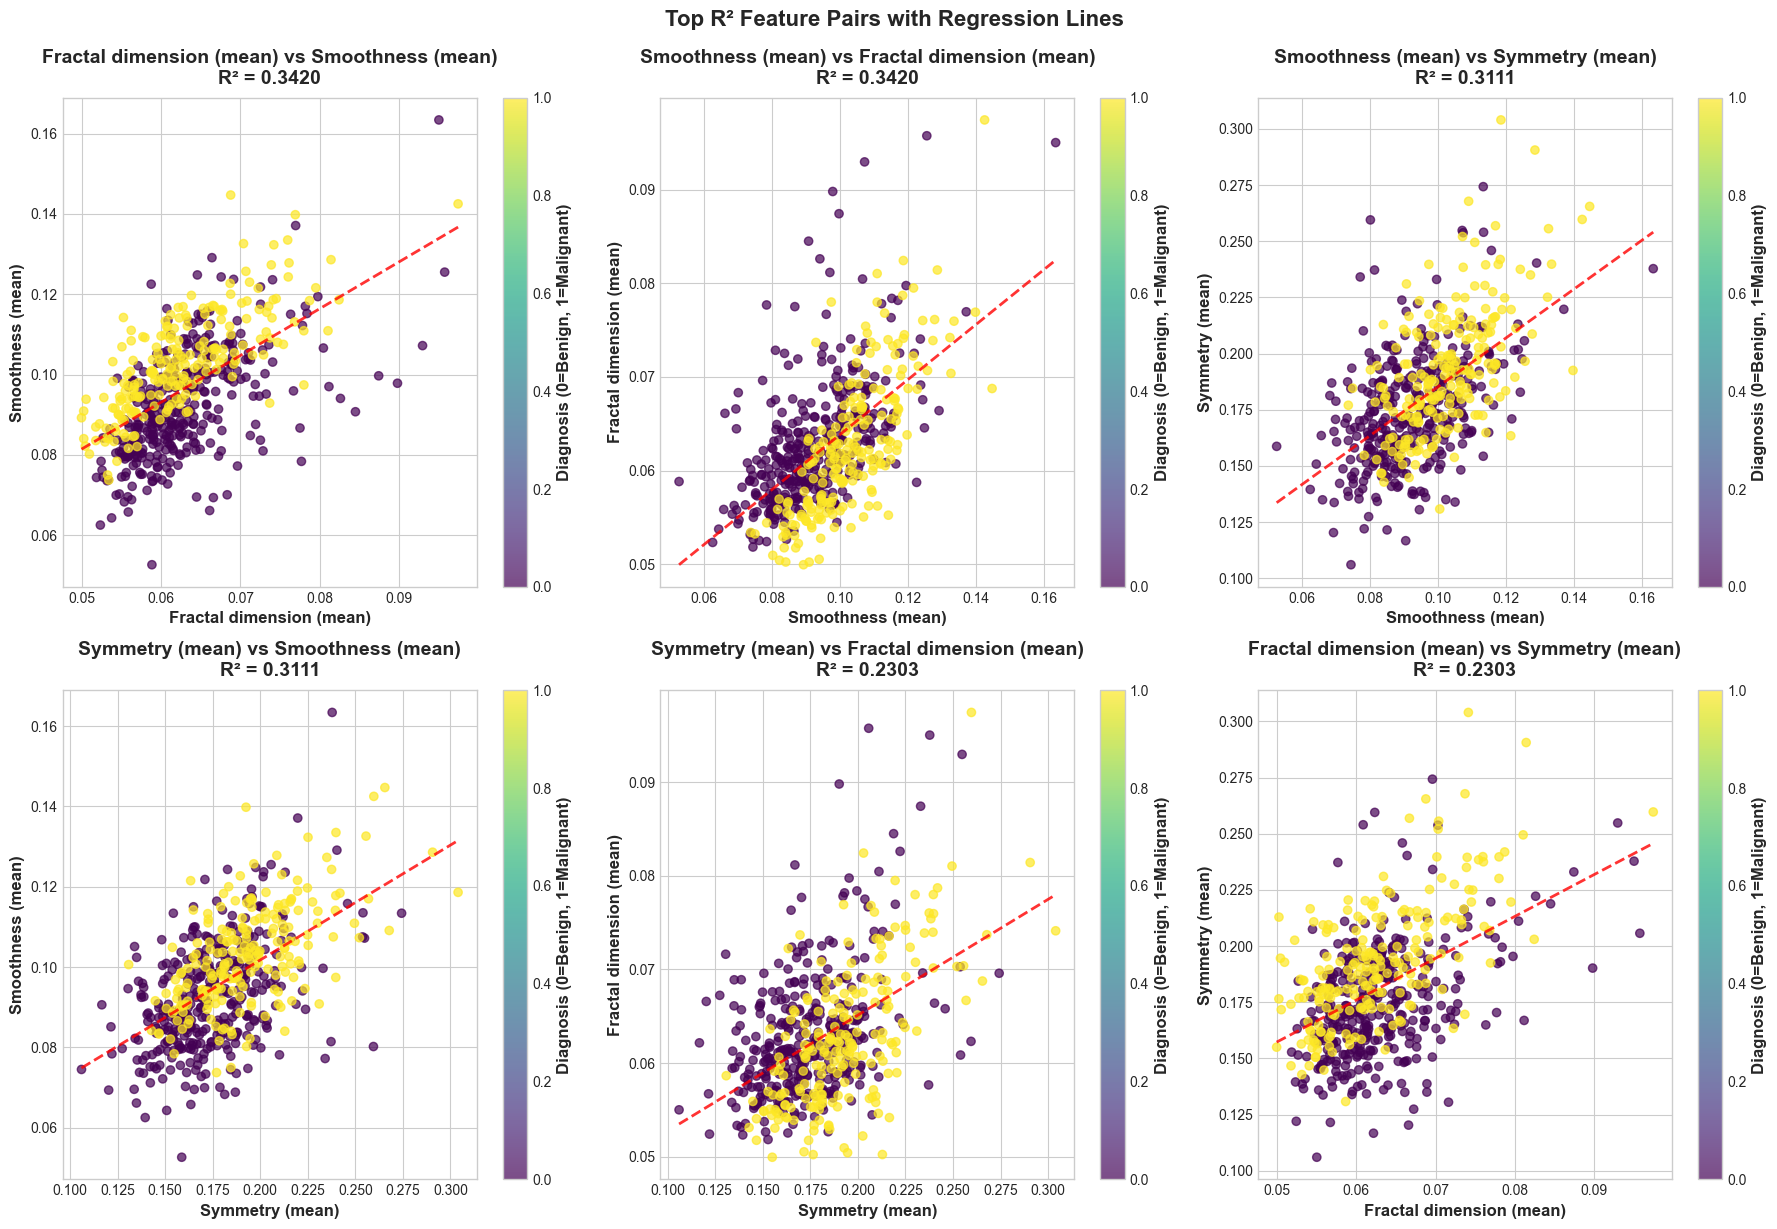


R² Statistics Summary:
Mean R²: 0.1416
Median R²: 0.1243
Standard Deviation: 0.1126
Minimum R²: 0.0005
Maximum R²: 0.3420
Number of pairs with R² > 0.7: 0
Number of pairs with R² > 0.5: 0
Number of pairs with R² > 0.3: 4


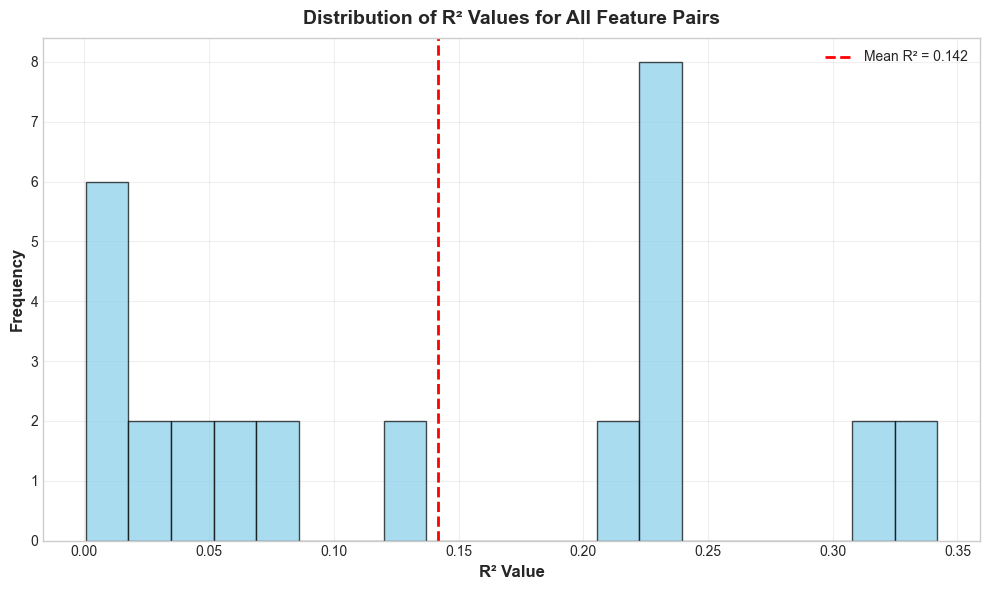

In [ ]:
# Load and prepare the data
cancer_data = pd.read_csv('cancer.csv', index_col='Id')
cancer_data['Diagnosis'] = cancer_data['Diagnosis'].map({'B': 0, 'M': 1})

# Selected features
selected_features = [
    'Radius (worst)',   
    'Texture (mean)',
    'Compactness (worst)',
    'Symmetry (mean)',
    'Fractal dimension (mean)', 
    'Smoothness (mean)'
]

X_selected = cancer_data[selected_features]

# Calculate R² for all feature pairs
n_features = len(selected_features)
r2_matrix = np.zeros((n_features, n_features))
feature_pairs_r2 = []

print("Calculating R² values for all feature pairs...\n")

for i, feature_x in enumerate(selected_features):
    for j, feature_y in enumerate(selected_features):
        if i != j:  # Skip self-comparison
            X_temp = X_selected[feature_x].values.reshape(-1, 1)
            y_temp = X_selected[feature_y].values
            
            model = LinearRegression()
            model.fit(X_temp, y_temp)
            y_pred = model.predict(X_temp)
            r2 = r2_score(y_temp, y_pred)
            
            r2_matrix[i, j] = r2
            feature_pairs_r2.append((feature_x, feature_y, r2))
        else:
            r2_matrix[i, j] = 1.0  # R² with itself is 1

# Create a DataFrame for the R² matrix
r2_df = pd.DataFrame(r2_matrix, 
                     index=selected_features, 
                     columns=selected_features)

# Display the R² matrix
print("R² Matrix (Feature X predicting Feature Y):")
print("=" * 60)
print(r2_df.round(4))
print("\n")

# Display top feature pairs with highest R² values
print("Top 10 Feature Pairs with Highest R²:")
print("=" * 50)
top_pairs = sorted(feature_pairs_r2, key=lambda x: x[2], reverse=True)[:10]
for i, (feature_x, feature_y, r2) in enumerate(top_pairs, 1):
    print(f"{i:2d}. {feature_x:25} → {feature_y:25}: R² = {r2:.4f}")

print("\n" + "=" * 50)
print("Bottom 10 Feature Pairs with Lowest R²:")
print("=" * 50)
bottom_pairs = sorted(feature_pairs_r2, key=lambda x: x[2])[:10]
for i, (feature_x, feature_y, r2) in enumerate(bottom_pairs, 1):
    print(f"{i:2d}. {feature_x:25} → {feature_y:25}: R² = {r2:.4f}")

# Create a heatmap of R² values
plt.figure(figsize=(12, 10))
sns.heatmap(r2_df, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0.5,
            fmt='.3f',
            square=True,
            cbar_kws={"shrink": 0.8, "label": "R² Value"})
plt.title('R² Matrix: Feature X predicting Feature Y\n(Higher values indicate stronger linear relationships)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Create scatter plots for the top 3 highest R² pairs
print("\nCreating scatter plots for top 3 highest R² pairs...")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (feature_x, feature_y, r2) in enumerate(top_pairs[:6]):
    # Create scatter plot
    scatter = axes[idx].scatter(X_selected[feature_x], X_selected[feature_y], 
                               c=cancer_data['Diagnosis'], 
                               cmap='viridis', alpha=0.7)
    axes[idx].set_xlabel(feature_x)
    axes[idx].set_ylabel(feature_y)
    axes[idx].set_title(f'{feature_x} vs {feature_y}\nR² = {r2:.4f}')
    
    # Add regression line
    z = np.polyfit(X_selected[feature_x], X_selected[feature_y], 1)
    p = np.poly1d(z)
    x_range = np.linspace(X_selected[feature_x].min(), X_selected[feature_x].max(), 100)
    axes[idx].plot(x_range, p(x_range), "r--", alpha=0.8, linewidth=2)
    
    # Add colorbar for diagnosis
    plt.colorbar(scatter, ax=axes[idx], label='Diagnosis (0=Benign, 1=Malignant)')

plt.tight_layout()
plt.suptitle('Top R² Feature Pairs with Regression Lines', y=1.02, fontsize=16, fontweight='bold')
plt.show()

# Statistical summary of R² values
r2_values = [pair[2] for pair in feature_pairs_r2]
print("\n" + "=" * 50)
print("R² Statistics Summary:")
print("=" * 50)
print(f"Mean R²: {np.mean(r2_values):.4f}")
print(f"Median R²: {np.median(r2_values):.4f}")
print(f"Standard Deviation: {np.std(r2_values):.4f}")
print(f"Minimum R²: {np.min(r2_values):.4f}")
print(f"Maximum R²: {np.max(r2_values):.4f}")
print(f"Number of pairs with R² > 0.7: {len([x for x in r2_values if x > 0.7])}")
print(f"Number of pairs with R² > 0.5: {len([x for x in r2_values if x > 0.5])}")
print(f"Number of pairs with R² > 0.3: {len([x for x in r2_values if x > 0.3])}")

# Create a distribution plot of R² values
plt.figure(figsize=(10, 6))
plt.hist(r2_values, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(r2_values), color='red', linestyle='--', linewidth=2, label=f'Mean R² = {np.mean(r2_values):.3f}')
plt.xlabel('R² Value')
plt.ylabel('Frequency')
plt.title('Distribution of R² Values for All Feature Pairs', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Calculating Feature Importance using Multiple Methods...

1. Random Forest Feature Importance:
                    feature  importance
5         Perimeter (worst)    0.277880
0            Radius (worst)    0.199971
7    Concave points (worst)    0.186726
6              Area (worst)    0.162332
1       Compactness (worst)    0.096899
4         Smoothness (mean)    0.029739
2           Symmetry (mean)    0.025957
3  Fractal dimension (mean)    0.020497

2. Mutual Information (Non-linear dependency):
                    feature  mi_score
5         Perimeter (worst)  0.474790
6              Area (worst)  0.465042
0            Radius (worst)  0.450160
7    Concave points (worst)  0.436782
1       Compactness (worst)  0.225257
4         Smoothness (mean)  0.080368
2           Symmetry (mean)  0.067360
3  Fractal dimension (mean)  0.006072

3. XGBoost Feature Importance:
                    feature  importance
0            Radius (worst)    0.676615
5         Perimeter (worst)    0.183991
7  

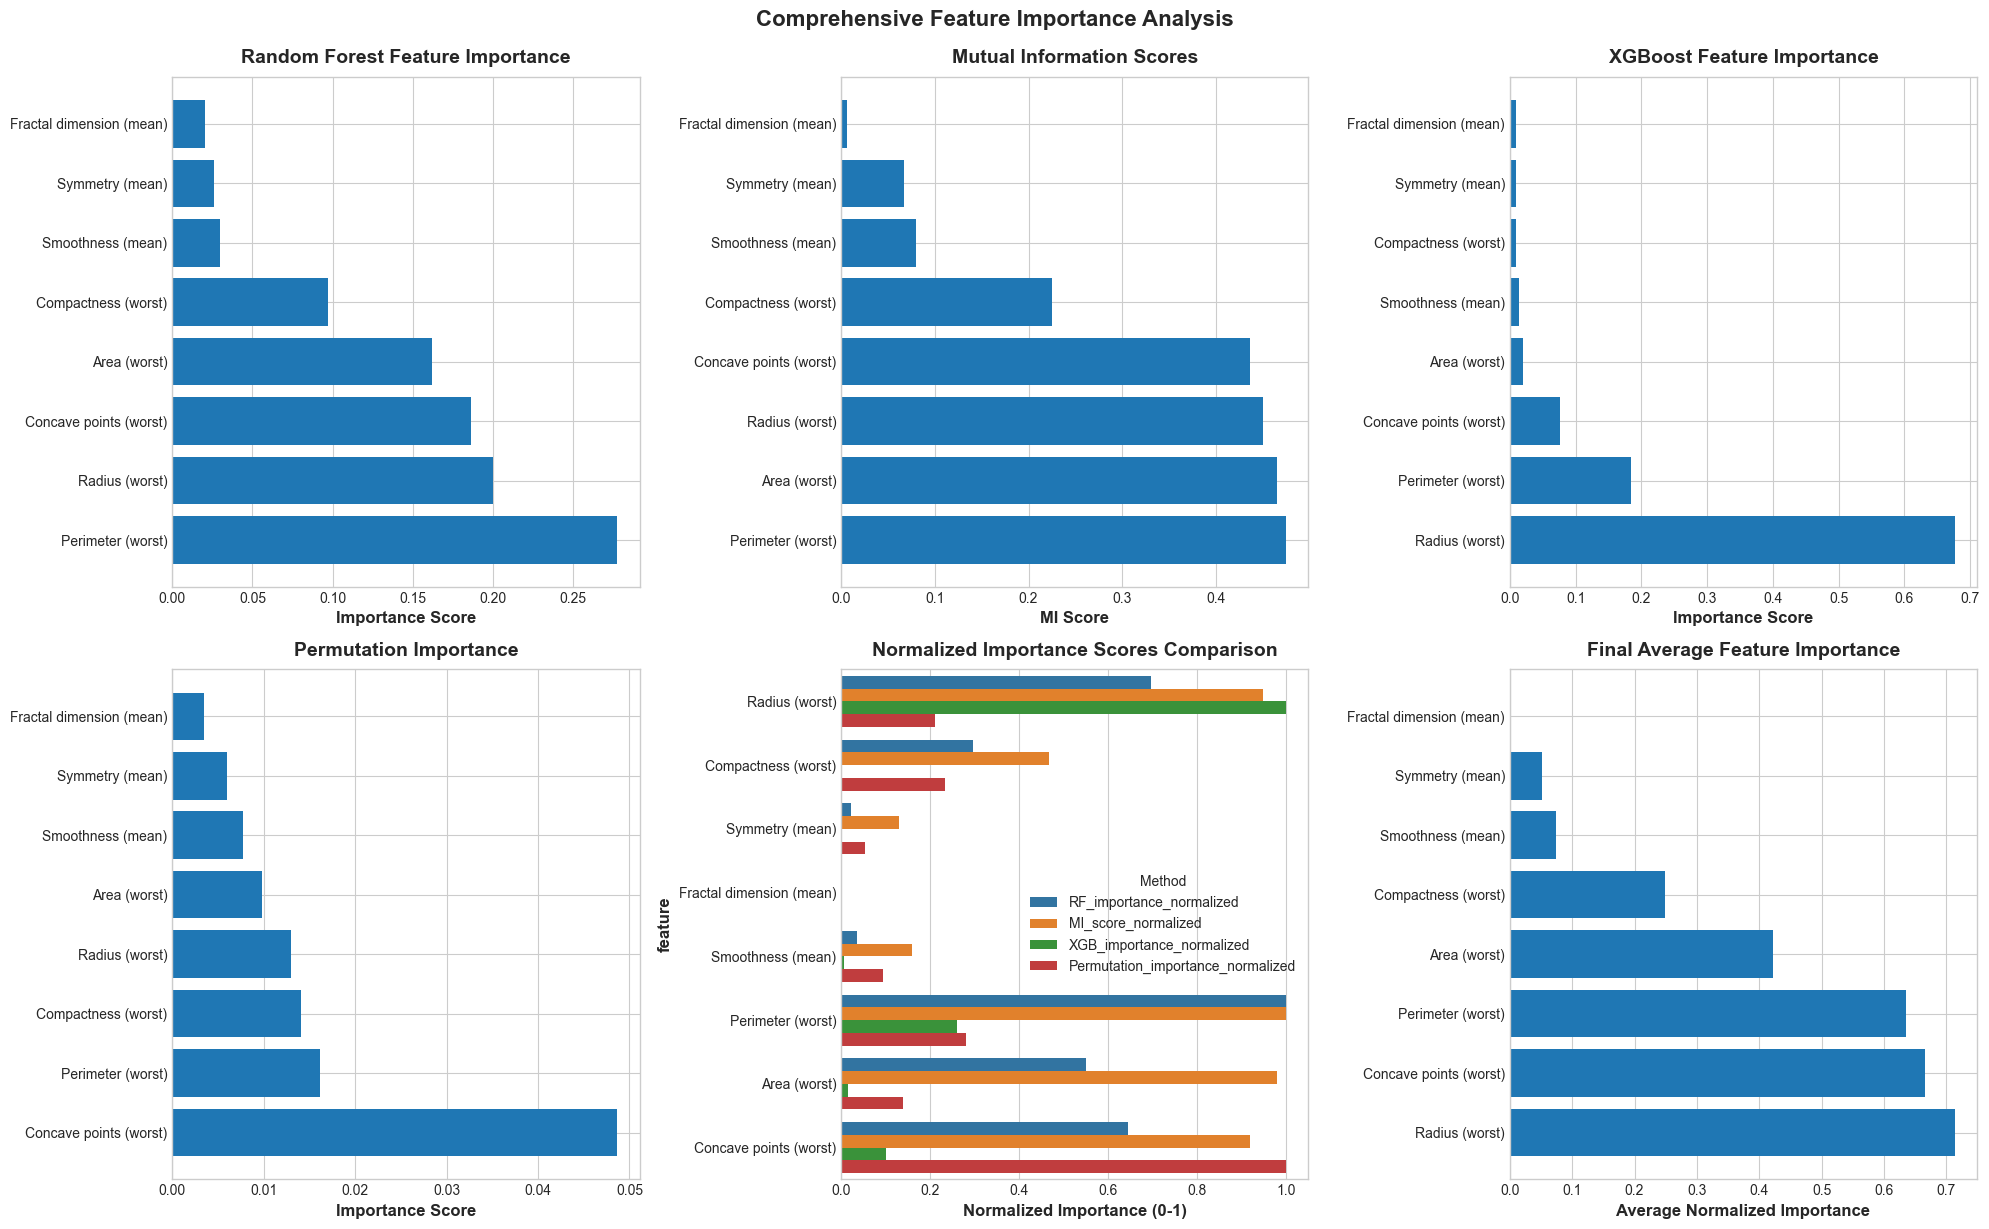


DETAILED ANALYSIS OF TOP FEATURES

Top Feature: Radius (worst)
Average Importance Score: 0.7137

Rank in each method:
- Random Forest: 1
- Mutual Information: 1
- XGBoost: 1
- Permutation: 1

FEATURE SELECTION RECOMMENDATION

Based on the analysis, here's the recommended feature ranking:
1. Radius (worst): 0.7137
2. Concave points (worst): 0.6663
3. Perimeter (worst): 0.6354
4. Area (worst): 0.4216
5. Compactness (worst): 0.2496
6. Smoothness (mean): 0.0733
7. Symmetry (mean): 0.0517
8. Fractal dimension (mean): 0.0000

Recommended features to keep (importance >= 0.5):
- Radius (worst)
- Concave points (worst)
- Perimeter (worst)

Features to consider dropping:
- Area (worst)
- Compactness (worst)
- Smoothness (mean)
- Symmetry (mean)
- Fractal dimension (mean)

Top 3 most important features: ['Radius (worst)', 'Concave points (worst)', 'Perimeter (worst)']


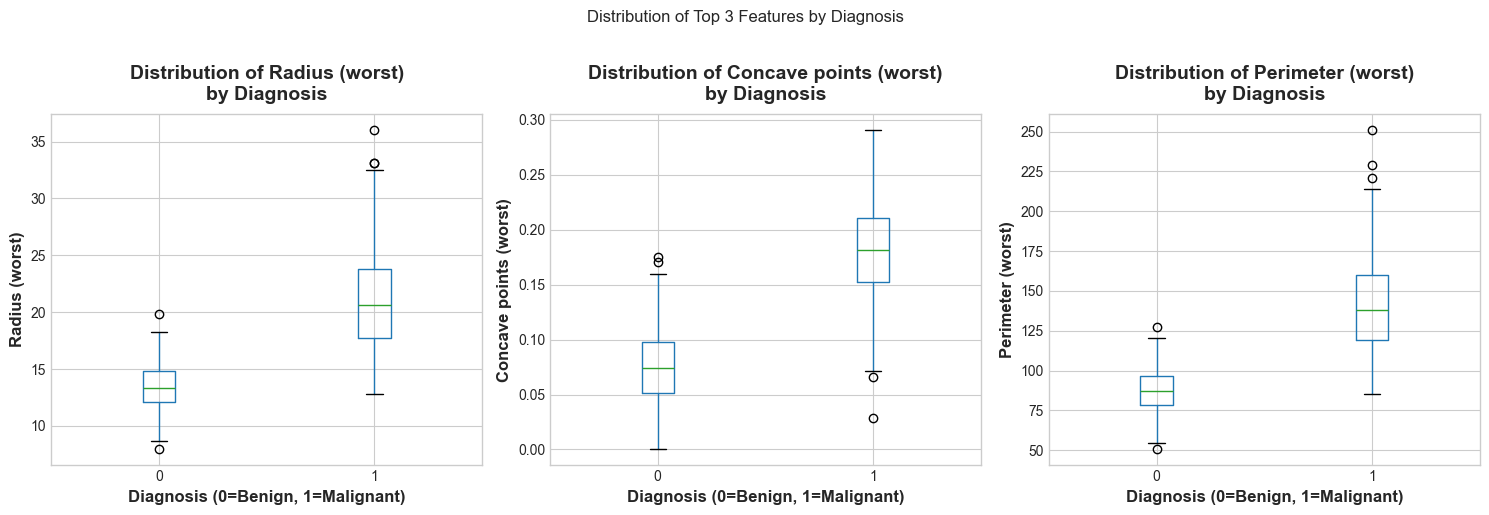

In [ ]:
# Load and prepare the data
cancer_data = pd.read_csv('cancer.csv', index_col='Id')
cancer_data['Diagnosis'] = cancer_data['Diagnosis'].map({'B': 0, 'M': 1})

# Selected features
selected_features = [
    'Radius (worst)',   
    'Compactness (worst)',
    'Symmetry (mean)',
    'Fractal dimension (mean)', 
    'Smoothness (mean)',
    'Perimeter (worst)',
    'Area (worst)',
    'Concave points (worst)'
]

X_selected = cancer_data[selected_features]
y = cancer_data['Diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

print("Calculating Feature Importance using Multiple Methods...")
print("=" * 60)

# Method 1: Random Forest Feature Importance
print("\n1. Random Forest Feature Importance:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled_df, y)
rf_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(rf_importance)

# Method 2: Mutual Information (non-linear dependency)
print("\n2. Mutual Information (Non-linear dependency):")
mi_scores = mutual_info_classif(X_scaled_df, y, random_state=42)
mi_importance = pd.DataFrame({
    'feature': selected_features,
    'mi_score': mi_scores
}).sort_values('mi_score', ascending=False)

print(mi_importance)

# Method 3: XGBoost Feature Importance
print("\n3. XGBoost Feature Importance:")
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_scaled_df, y)
xgb_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)

print(xgb_importance)

# Method 4: Permutation Importance
print("\n4. Permutation Importance:")
perm_importance = permutation_importance(rf, X_scaled_df, y, 
                                       n_repeats=10, 
                                       random_state=42)
perm_df = pd.DataFrame({
    'feature': selected_features,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print(perm_df[['feature', 'importance_mean']])

# Create comprehensive comparison
print("\n5. Comprehensive Feature Importance Comparison:")
comparison_df = pd.DataFrame({
    'feature': selected_features,
    'RF_importance': rf.feature_importances_,
    'MI_score': mi_scores,
    'XGB_importance': xgb.feature_importances_,
    'Permutation_importance': perm_importance.importances_mean
})

# Normalize each importance score to 0-1 range for comparison
for col in comparison_df.columns[1:]:
    comparison_df[f'{col}_normalized'] = (comparison_df[col] - comparison_df[col].min()) / (comparison_df[col].max() - comparison_df[col].min())

print("\nNormalized Importance Scores (0-1):")
print(comparison_df[['feature', 'RF_importance_normalized', 'MI_score_normalized', 
                    'XGB_importance_normalized', 'Permutation_importance_normalized']].round(4))

# Calculate average normalized importance
comparison_df['average_importance'] = comparison_df[['RF_importance_normalized', 
                                                    'MI_score_normalized', 
                                                    'XGB_importance_normalized', 
                                                    'Permutation_importance_normalized']].mean(axis=1)

final_ranking = comparison_df[['feature', 'average_importance']].sort_values('average_importance', ascending=False)
print("\n6. Final Feature Ranking (Average of All Methods):")
print(final_ranking)

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Plot 1: Random Forest Importance
axes[0].barh(rf_importance['feature'], rf_importance['importance'])
axes[0].set_title('Random Forest Feature Importance')
axes[0].set_xlabel('Importance Score')

# Plot 2: Mutual Information
axes[1].barh(mi_importance['feature'], mi_importance['mi_score'])
axes[1].set_title('Mutual Information Scores')
axes[1].set_xlabel('MI Score')

# Plot 3: XGBoost Importance
axes[2].barh(xgb_importance['feature'], xgb_importance['importance'])
axes[2].set_title('XGBoost Feature Importance')
axes[2].set_xlabel('Importance Score')

# Plot 4: Permutation Importance
axes[3].barh(perm_df['feature'], perm_df['importance_mean'])
axes[3].set_title('Permutation Importance')
axes[3].set_xlabel('Importance Score')

# Plot 5: Normalized Comparison
normalized_data = comparison_df[['feature', 'RF_importance_normalized', 
                               'MI_score_normalized', 'XGB_importance_normalized',
                               'Permutation_importance_normalized']].melt(id_vars=['feature'])
sns.barplot(data=normalized_data, y='feature', x='value', hue='variable', ax=axes[4])
axes[4].set_title('Normalized Importance Scores Comparison')
axes[4].set_xlabel('Normalized Importance (0-1)')
axes[4].legend(title='Method')

# Plot 6: Final Average Ranking
axes[5].barh(final_ranking['feature'], final_ranking['average_importance'])
axes[5].set_title('Final Average Feature Importance')
axes[5].set_xlabel('Average Normalized Importance')

plt.tight_layout()
plt.suptitle('Comprehensive Feature Importance Analysis', y=1.02, fontsize=16, fontweight='bold')
plt.show()

# Detailed analysis of top features
print("\n" + "=" * 60)
print("DETAILED ANALYSIS OF TOP FEATURES")
print("=" * 60)

top_feature = final_ranking.iloc[0]['feature']
print(f"\nTop Feature: {top_feature}")
print(f"Average Importance Score: {final_ranking.iloc[0]['average_importance']:.4f}")

# Show how each method ranked this feature
print(f"\nRank in each method:")
print(f"- Random Forest: {rf_importance[rf_importance['feature'] == top_feature].index[0] + 1}")
print(f"- Mutual Information: {mi_importance[mi_importance['feature'] == top_feature].index[0] + 1}")
print(f"- XGBoost: {xgb_importance[xgb_importance['feature'] == top_feature].index[0] + 1}")
print(f"- Permutation: {perm_df[perm_df['feature'] == top_feature].index[0] + 1}")

# Feature selection recommendation
print("\n" + "=" * 60)
print("FEATURE SELECTION RECOMMENDATION")
print("=" * 60)

print("\nBased on the analysis, here's the recommended feature ranking:")
for i, (feature, score) in enumerate(zip(final_ranking['feature'], final_ranking['average_importance']), 1):
    print(f"{i}. {feature}: {score:.4f}")

# Suggest which features to keep based on importance threshold
importance_threshold = 0.5  # You can adjust this threshold
recommended_features = final_ranking[final_ranking['average_importance'] >= importance_threshold]['feature'].tolist()

print(f"\nRecommended features to keep (importance >= {importance_threshold}):")
for feature in recommended_features:
    print(f"- {feature}")

if len(recommended_features) < len(selected_features):
    print(f"\nFeatures to consider dropping:")
    for feature in final_ranking[final_ranking['average_importance'] < importance_threshold]['feature']:
        print(f"- {feature}")

# Create a boxplot of feature distributions by diagnosis for top 3 features
top_3_features = final_ranking.head(3)['feature'].tolist()
print(f"\nTop 3 most important features: {top_3_features}")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(top_3_features):
    cancer_data.boxplot(column=feature, by='Diagnosis', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}\nby Diagnosis')
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel('Diagnosis (0=Benign, 1=Malignant)')

plt.suptitle('Distribution of Top 3 Features by Diagnosis', y=1.02)
plt.tight_layout()
plt.show()

# choosing the right model

Training models...


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

COMPREHENSIVE MODEL REPORT

Dataset Information:
Selected features: ['Concave points (worst)', 'Perimeter (worst)', 'Radius (worst)', 'Area (worst)', 'Concavity (worst)']
Training set shape: (455, 5)
Test set shape: (114, 5)
Class distribution:
Diagnosis
0    285
1    170
Name: count, dtype: int64

ADA_BOOST Results:
Accuracy: 0.9386
AUC Score: 0.9714
Cross-validation Scores: [0.97802198 0.96703297 0.91208791 0.95604396 0.85714286]
Mean CV Accuracy: 0.9341 (+/- 0.0890)

GRADIENT_BOOST Results:
Accuracy: 0.9298
AUC Score: 0.9919
Cross-validation Scores: [0.95604396 0.97802198 0.9010989  0.95604396 0.86813187]
Mean CV Accuracy: 0.9319 (+/- 0.0815)

Detailed Classification Reports:

ADA_BOOST Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.95      0.96      0.95        72
Malignant (1)       0.93      0.90      0.92        42

     accuracy                           0.94       114
    macro avg       0.94      0.93      0.93       114
 

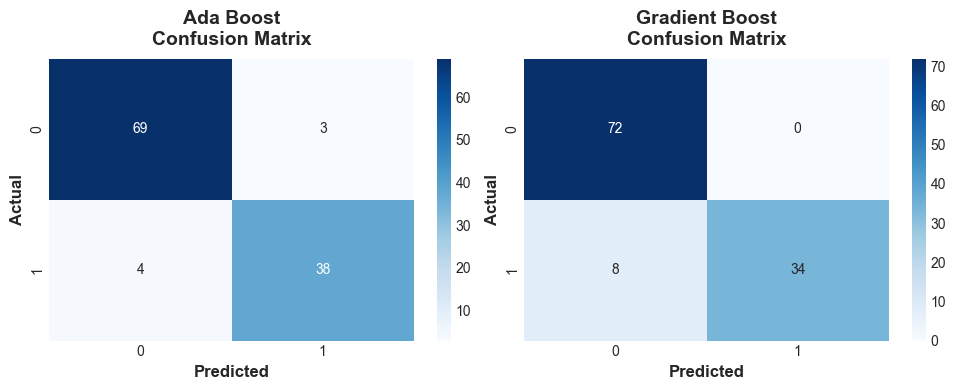

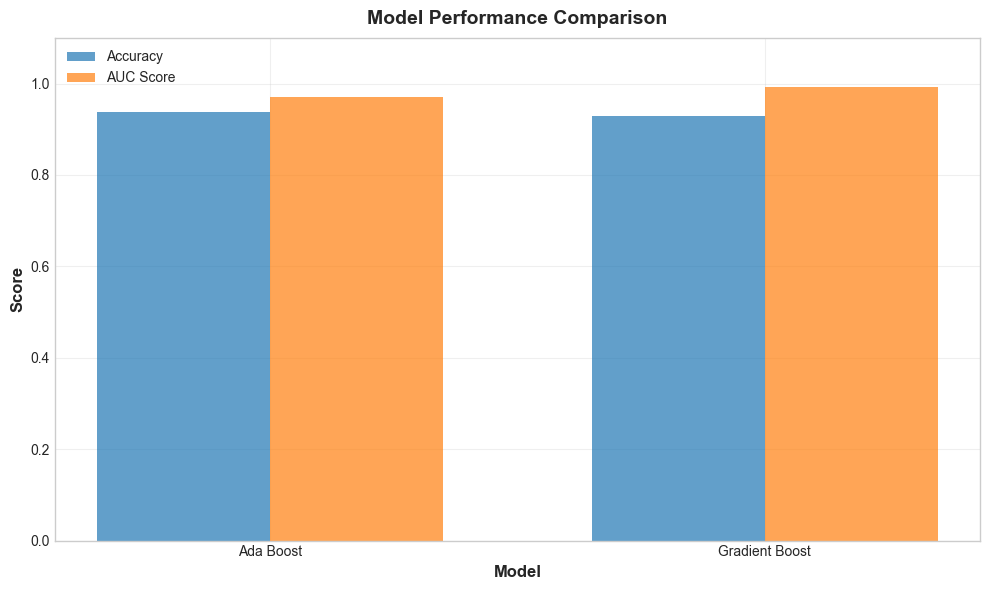

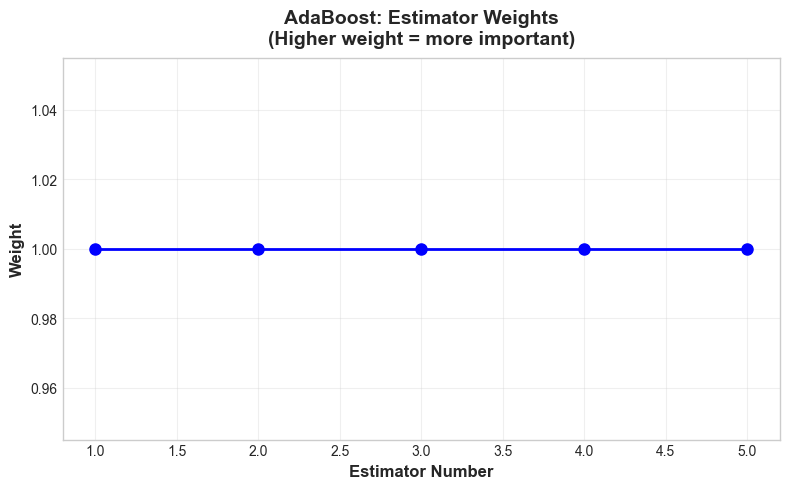

Testing n_estimators range: [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

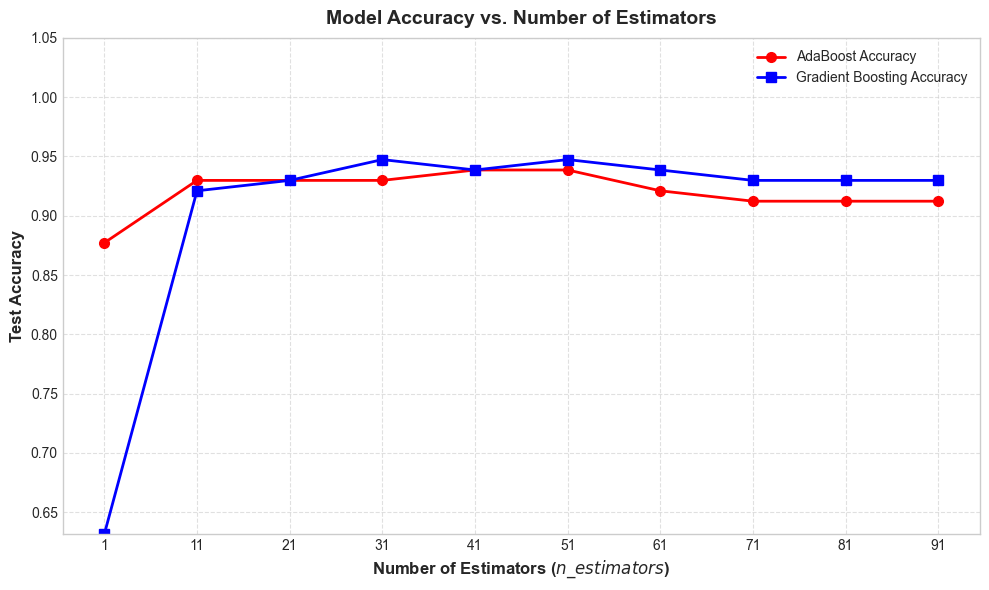


AdaBoost Individual Estimator Analysis:
Estimator 1 accuracy: 0.8772
Estimator 2 accuracy: 0.9123
Estimator 3 accuracy: 0.7105
Estimator 4 accuracy: 0.8158
Estimator 5 accuracy: 0.1228

Estimator weights: [1. 1. 1. 1. 1.]


In [ ]:
class CancerBoostingClassifier:
    
    def __init__(self, selected_features, test_size=0.2, random_state=42):

        self.selected_features = selected_features
        self.test_size = test_size
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.models = {}
        self.results = {}
        
    def load_and_prepare_data(self, data_path='cancer.csv'):

        cancer_data = pd.read_csv(data_path, index_col='Id')
        cancer_data['Diagnosis'] = cancer_data['Diagnosis'].map({'B': 0, 'M': 1})
        
        # Select features and target
        X = cancer_data[self.selected_features]
        y = cancer_data['Diagnosis']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, 
            test_size=self.test_size, 
            random_state=self.random_state, 
            stratify=y
        )
        
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        self.X_train = X_train
        self.X_test = X_test
        self.X_train_scaled = X_train_scaled
        self.X_test_scaled = X_test_scaled
        self.y_train = y_train
        self.y_test = y_test
        
        return X_train_scaled, X_test_scaled, y_train, y_test
    
    def train_ada_boost(self, n_estimators=5, learning_rate=1.0):

        ada_model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n_estimators,
            random_state=self.random_state,
            learning_rate=learning_rate
        )
        
        ada_model.fit(self.X_train_scaled, self.y_train)
        self.models['ada_boost'] = ada_model
        return ada_model
    
    def train_gradient_boost(self, n_estimators=5, learning_rate=0.1, max_depth=3):
        """
        Train Gradient Boosting classifier
        """
        gb_model = GradientBoostingClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=self.random_state,
            learning_rate=learning_rate
        )
        
        gb_model.fit(self.X_train_scaled, self.y_train)
        self.models['gradient_boost'] = gb_model
        return gb_model
    
    def evaluate_model(self, model, model_name):
        """
        Evaluate a model and store results
        """
        # Predictions
        y_pred = model.predict(self.X_test_scaled)
        y_pred_proba = model.predict_proba(self.X_test_scaled)[:, 1]
        
        # Calculate metrics
        accuracy = accuracy_score(self.y_test, y_pred)
        auc_score = roc_auc_score(self.y_test, y_pred_proba)
        cv_scores = cross_val_score(model, self.X_train_scaled, self.y_train, cv=5, scoring='accuracy')
        
        # Store results
        results = {
            'model': model,
            'predictions': y_pred,
            'probabilities': y_pred_proba,
            'accuracy': accuracy,
            'auc_score': auc_score,
            'cv_scores': cv_scores,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std()
        }
        
        self.results[model_name] = results
        return results
    
    def print_model_results(self, model_name):
        """
        Print results for a specific model
        """
        if model_name not in self.results:
            print(f"No results found for {model_name}")
            return
            
        results = self.results[model_name]
        print(f"\n{model_name.upper()} Results:")
        print(f"Accuracy: {results['accuracy']:.4f}")
        print(f"AUC Score: {results['auc_score']:.4f}")
        print(f"Cross-validation Scores: {results['cv_scores']}")
        print(f"Mean CV Accuracy: {results['cv_mean']:.4f} (+/- {results['cv_std'] * 2:.4f})")
    
    def plot_confusion_matrices(self):
        """
        Plot confusion matrices for all models
        """
        n_models = len(self.results)
        fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 4))
        if n_models == 1:
            axes = [axes]
        
        for idx, (model_name, results) in enumerate(self.results.items()):
            cm = confusion_matrix(self.y_test, results['predictions'])
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
            axes[idx].set_title(f'{model_name.replace("_", " ").title()}\nConfusion Matrix')
            axes[idx].set_xlabel('Predicted')
            axes[idx].set_ylabel('Actual')
        
        plt.tight_layout()
        plt.show()
        return fig
    
    def plot_model_comparison(self):
        """
        Plot comparison of all models
        """
        models = list(self.results.keys())
        accuracies = [self.results[model]['accuracy'] for model in models]
        auc_scores = [self.results[model]['auc_score'] for model in models]
        
        fig, ax = plt.subplots(figsize=(10, 6))
        x = np.arange(len(models))
        width = 0.35
        
        ax.bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.7)
        ax.bar(x + width/2, auc_scores, width, label='AUC Score', alpha=0.7)
        ax.set_title('Model Performance Comparison')
        ax.set_xlabel('Model')
        ax.set_ylabel('Score')
        ax.set_xticks(x)
        ax.set_xticklabels([model.replace('_', ' ').title() for model in models])
        ax.legend()
        ax.set_ylim(0, 1.1)
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        return fig
    
    def plot_learning_curve(self):
        """
        Plot learning curve showing estimator weights for AdaBoost
        """
        if 'ada_boost' in self.models:
            ada_model = self.models['ada_boost']
            fig, ax = plt.subplots(figsize=(8, 5))
            ax.plot(range(1, len(ada_model.estimator_weights_) + 1), 
                    ada_model.estimator_weights_, 'bo-', linewidth=2, markersize=8)
            ax.set_title('AdaBoost: Estimator Weights\n(Higher weight = more important)')
            ax.set_xlabel('Estimator Number')
            ax.set_ylabel('Weight')
            ax.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            return fig
    
    # ----------------------------------------------------
    # NEW FUNCTION: Plotting n_estimators vs. Accuracy
    # ----------------------------------------------------
    def plot_n_estimators_vs_accuracy(self, n_estimators_range=range(1, 101, 10)):
        """
        Plot the test accuracy of AdaBoost and Gradient Boosting classifiers 
        as a function of the number of estimators (n_estimators).

        Args:
            n_estimators_range (range): Range of n_estimators values to test.

        Returns:
            matplotlib.figure: The generated plot figure.
        """
        ada_accuracies = []
        gb_accuracies = []
        
        # Ensure data is loaded and scaled before proceeding
        if not hasattr(self, 'X_train_scaled'):
            print("Error: Data must be loaded and prepared using load_and_prepare_data() first.")
            return None

        print(f"Testing n_estimators range: {list(n_estimators_range)}")
        for n in n_estimators_range:
            # 1. Train and evaluate AdaBoost (Base estimator: DecisionTree(max_depth=1))
            ada_model = self.train_ada_boost(n_estimators=n)
            y_pred_ada = ada_model.predict(self.X_test_scaled)
            ada_accuracy = accuracy_score(self.y_test, y_pred_ada)
            ada_accuracies.append(ada_accuracy)
            
            # 2. Train and evaluate Gradient Boosting (Base estimator: DecisionTree(max_depth=3))
            gb_model = self.train_gradient_boost(n_estimators=n)
            y_pred_gb = gb_model.predict(self.X_test_scaled)
            gb_accuracy = accuracy_score(self.y_test, y_pred_gb)
            gb_accuracies.append(gb_accuracy)

        # 3. Plotting
        fig, ax = plt.subplots(figsize=(10, 6))
        
        n_values = list(n_estimators_range)
        
        ax.plot(n_values, ada_accuracies, 'r-o', label='AdaBoost Accuracy', linewidth=2, markersize=7)
        ax.plot(n_values, gb_accuracies, 'b-s', label='Gradient Boosting Accuracy', linewidth=2, markersize=7)
        
        ax.set_title('Model Accuracy vs. Number of Estimators')
        ax.set_xlabel('Number of Estimators ($n\_estimators$)')
        ax.set_ylabel('Test Accuracy')
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.set_xticks(n_values)
        ax.set_ylim(max(0, min(min(ada_accuracies), min(gb_accuracies), 0.75)), 1.05)
        
        plt.tight_layout()
        plt.show()
        
        return fig
    # ----------------------------------------------------
    
    def generate_comprehensive_report(self):
        """
        Generate a comprehensive report of all models
        """
        print("="*60)
        print("COMPREHENSIVE MODEL REPORT")
        print("="*60)
        
        # Print dataset info
        print(f"\nDataset Information:")
        print(f"Selected features: {self.selected_features}")
        print(f"Training set shape: {self.X_train.shape}")
        print(f"Test set shape: {self.X_test.shape}")
        print(f"Class distribution:\n{self.y_train.value_counts()}")
        
        # Print results for each model
        for model_name in self.results.keys():
            self.print_model_results(model_name)
        
        # Print classification reports
        print("\nDetailed Classification Reports:")
        for model_name, results in self.results.items():
            print(f"\n{model_name.upper()} Classification Report:")
            print(classification_report(self.y_test, results['predictions'], 
                                        target_names=['Benign (0)', 'Malignant (1)']))
        
        # Determine best model
        best_model_name = max(self.results.keys(), 
                              key=lambda x: self.results[x]['accuracy'])
        best_accuracy = self.results[best_model_name]['accuracy']
        
        print(f"\nBest Model: {best_model_name.replace('_', ' ').title()}")
        print(f"Best Accuracy: {best_accuracy:.4f}")


# Standalone functions for specific tasks
def create_model_comparison_plot(results_dict):
    """
    Create a comparison plot from results dictionary
    """
    models = list(results_dict.keys())
    accuracies = [results_dict[model]['accuracy'] for model in models]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(models, accuracies, alpha=0.7)
    ax.set_title('Model Accuracy Comparison')
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0, 1.1)
    
    # Add value labels on bars
    for bar, accuracy in zip(bars, accuracies):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{accuracy:.4f}', ha='center', va='bottom')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    return fig


def analyze_individual_estimators(ada_model, X_test, y_test):
    """
    Analyze individual estimators in AdaBoost model
    """
    print("\nAdaBoost Individual Estimator Analysis:")
    print("="*40)
    
    for i, estimator in enumerate(ada_model.estimators_):
        individual_pred = estimator.predict(X_test)
        individual_accuracy = accuracy_score(y_test, individual_pred)
        print(f"Estimator {i+1} accuracy: {individual_accuracy:.4f}")
    
    print(f"\nEstimator weights: {ada_model.estimator_weights_}")


# Main execution function
def main():
    """
    Main function to demonstrate the refactored code and new plot
    """
    # Selected features
    selected_features = [
        'Concave points (worst)',
        'Perimeter (worst)',
        'Radius (worst)',
        'Area (worst)',
        'Concavity (worst)'
    ]
    
    # Initialize classifier
    cancer_classifier = CancerBoostingClassifier(selected_features=selected_features)
    
    # Load and prepare data
    cancer_classifier.load_and_prepare_data('cancer.csv')
    
    # Train models
    print("Training models...")
    ada_model = cancer_classifier.train_ada_boost(n_estimators=5)
    gb_model = cancer_classifier.train_gradient_boost(n_estimators=5)
    
    # Evaluate models
    cancer_classifier.evaluate_model(ada_model, 'ada_boost')
    cancer_classifier.evaluate_model(gb_model, 'gradient_boost')
    
    # Generate comprehensive report
    cancer_classifier.generate_comprehensive_report()
    
    # Create visualizations
    print("\nGenerating Visualizations...")
    cancer_classifier.plot_confusion_matrices()
    cancer_classifier.plot_model_comparison()
    cancer_classifier.plot_learning_curve()
    
    # Call the new function for n_estimators vs. accuracy plot
    cancer_classifier.plot_n_estimators_vs_accuracy(n_estimators_range=range(1, 101, 10))
    
    # Additional analysis
    analyze_individual_estimators(ada_model, cancer_classifier.X_test_scaled, cancer_classifier.y_test)
    
    return cancer_classifier


if __name__ == "__main__":
    # Run the main function
    classifier = main()

In [ ]:
class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=self.n_components)
        
    def fit(self, X, y=None):
        X_scaled = self.scaler.fit_transform(X)
        X_pca = self.pca.fit_transform(X_scaled)
        return X_pca
    
    def transform(self, X):
        X_scaled = self.scaler.transform(X)
        X_pca = self.pca.transform(X_scaled)
        return X_pca
    
    def fit_transform(self, X):
        X_scaled = self.scaler.fit_transform(X)
        X_pca = self.pca.fit_transform(X_scaled)
        return X_pca
    
class CancerAdaBoostPCA:
    def __init__(self, test_size=0.2, random_state=42):
        self.test_size = test_size
        self.random_state = random_state

    def load_data(self, path="cancer.csv"):
        data = pd.read_csv(path, index_col='Id')
        data['Diagnosis'] = data['Diagnosis'].map({'B': 0, 'M': 1})
        X = data.drop(columns=['Diagnosis'])
        y = data['Diagnosis']

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=self.random_state
        )
        return self.X_train, self.X_test, self.y_train, self.y_test

    def build_pipeline(self):
        self.pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('ada', AdaBoostClassifier(random_state=self.random_state))
        ])

    def tune_hyperparameters(self):
        grid = {
            'pca__n_components': [3, 5, 8, 10],
            'ada__n_estimators': [50, 100, 200],
            'ada__learning_rate': [0.01, 0.1, 0.5, 1.0],
            'ada__estimator': [
                DecisionTreeClassifier(max_depth=1),
                DecisionTreeClassifier(max_depth=2),
                DecisionTreeClassifier(max_depth=3)
            ]
        }

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state)

        self.grid_search = GridSearchCV(
            self.pipeline,
            param_grid=grid,
            scoring='f1',
            n_jobs=-1,
            cv=cv,
            verbose=2
        )

        self.grid_search.fit(self.X_train, self.y_train)
        self.model = self.grid_search.best_estimator_

        print("\nBest Params:", self.grid_search.best_params_)

    def evaluate_with_threshold(self, threshold=0.5):
        y_proba = self.model.predict_proba(self.X_test)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)

        accuracy = accuracy_score(self.y_test, y_pred)
        precision = precision_score(self.y_test, y_pred)
        recall = recall_score(self.y_test, y_pred)
        f1 = f1_score(self.y_test, y_pred)
        auc = roc_auc_score(self.y_test, y_proba)

        print(f"\n📌 Threshold = {threshold}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1: {f1:.4f}")
        print(f"AUC: {auc:.4f}")

        return y_proba, y_pred

    def find_best_threshold(self, target_recall=0.95):
        y_proba = self.model.predict_proba(self.X_test)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(self.y_test, y_proba)

        for p, r, t in zip(precisions, recalls, thresholds):
            if r >= target_recall:
                print(f"\n🔥 Best Threshold for Recall ≥ {target_recall}: {t:.3f}")
                self.evaluate_with_threshold(t)
                return t

        print("\n⚠️ Threshold برای این سطح Recall یافت نشد.")
        return 0.5


In [6]:
def main():
    model = CancerAdaBoostPCA()
    model.load_data()
    model.build_pipeline()
    model.tune_hyperparameters()
    
    # Threshold Specialist Evaluation
    model.evaluate_with_threshold(0.5)

    # Find Threshold for Recall ≥ 0.95
    model.find_best_threshold(target_recall=0.95)

    return model


if __name__ == "__main__":
    model = main()


Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Best Params: {'ada__estimator': DecisionTreeClassifier(max_depth=1), 'ada__learning_rate': 1.0, 'ada__n_estimators': 200, 'pca__n_components': 10}

📌 Threshold = 0.5
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1: 0.9630
AUC: 0.9954

🔥 Best Threshold for Recall ≥ 0.95: 0.377

📌 Threshold = 0.37655863680536117
Accuracy: 0.3684
Precision: 0.3684
Recall: 1.0000
F1: 0.5385
AUC: 0.9954


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr


📊 AdaBoost Model Evaluation Results
Accuracy : 0.9298
AUC Score: 0.9897
Precision: 0.9250
Recall   : 0.8810
F1-score : 0.9024
Cross-Val Mean: 0.9429 (+/- 0.0754)

Detailed Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.93      0.96      0.95        72
Malignant (1)       0.93      0.88      0.90        42

     accuracy                           0.93       114
    macro avg       0.93      0.92      0.92       114
 weighted avg       0.93      0.93      0.93       114



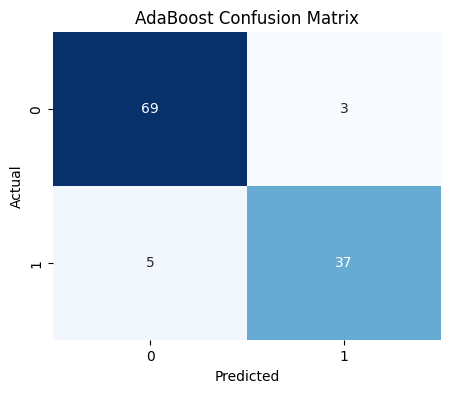

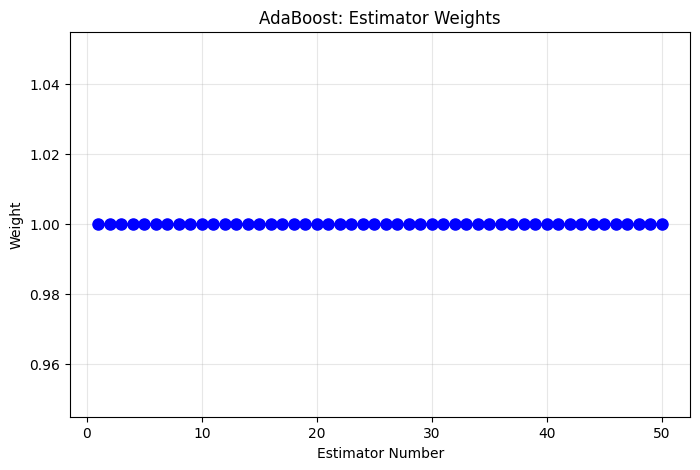

In [ ]:
class CancerAdaBoostClassifier:
    
    def __init__(self, selected_features, test_size=0.2, random_state=42):
        self.selected_features = selected_features
        self.test_size = test_size
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.model = None
        self.results = {}
        
    def load_and_prepare_data(self, data_path='cancer.csv'):
        """
        Load dataset, encode target, split, and scale features.
        """
        data = pd.read_csv(data_path, index_col='Id')
        data['Diagnosis'] = data['Diagnosis'].map({'B': 0, 'M': 1})

        X = data[self.selected_features]
        y = data['Diagnosis']

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state, stratify=y
        )

        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        self.X_train_scaled, self.X_test_scaled = X_train_scaled, X_test_scaled
        self.y_train, self.y_test = y_train, y_test

        return X_train_scaled, X_test_scaled, y_train, y_test

    def train_ada_boost(self, n_estimators=50, learning_rate=0.01):
        """
        Train AdaBoost classifier.
        """
        self.model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=2),
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=self.random_state
        )
        self.model.fit(self.X_train_scaled, self.y_train)
        return self.model

    def evaluate_model(self):
        """
        Evaluate the AdaBoost model with detailed metrics.
        """
        if self.model is None:
            print("Error: Model not trained yet.")
            return

        y_pred = self.model.predict(self.X_test_scaled)
        y_pred_proba = self.model.predict_proba(self.X_test_scaled)[:, 1]

        accuracy = accuracy_score(self.y_test, y_pred)
        auc_score = roc_auc_score(self.y_test, y_pred_proba)
        precision = precision_score(self.y_test, y_pred)
        recall = recall_score(self.y_test, y_pred)
        f1 = f1_score(self.y_test, y_pred)
        cv_scores = cross_val_score(self.model, self.X_train_scaled, self.y_train, cv=5)

        self.results = {
            'accuracy': accuracy,
            'auc': auc_score,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std()
        }

        print("\n📊 AdaBoost Model Evaluation Results")
        print("=" * 45)
        print(f"Accuracy : {accuracy:.4f}")
        print(f"AUC Score: {auc_score:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall   : {recall:.4f}")
        print(f"F1-score : {f1:.4f}")
        print(f"Cross-Val Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

        print("\nDetailed Classification Report:")
        print(classification_report(self.y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)']))

        return self.results



    def plot_confusion_matrix(self):
        """
        Plot confusion matrix.
        """
        y_pred = self.model.predict(self.X_test_scaled)
        cm = confusion_matrix(self.y_test, y_pred)

        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title('AdaBoost Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    def plot_learning_curve(self):
        """
        Plot AdaBoost estimator weights.
        """
        plt.figure(figsize=(8, 5))
        plt.plot(
            range(1, len(self.model.estimator_weights_) + 1),
            self.model.estimator_weights_, 'bo-', linewidth=2, markersize=8
        )
        plt.title('AdaBoost: Estimator Weights')
        plt.xlabel('Estimator Number')
        plt.ylabel('Weight')
        plt.grid(True, alpha=0.3)
        plt.show()


def main():
    """
    Main execution function for AdaBoost classification.
    """
    selected_features = [
        'Concave points (worst)',
        'Perimeter (worst)',
        'Radius (worst)',
        'Area (worst)',
        'Concavity (worst)'
    ]

    cancer_model = CancerAdaBoostClassifier(selected_features)
    cancer_model.load_and_prepare_data('cancer.csv')
    cancer_model.train_ada_boost(n_estimators=50, learning_rate=1.0)
    cancer_model.evaluate_model()
    cancer_model.plot_confusion_matrix()
    cancer_model.plot_learning_curve()
    
    # best_threshold, best_metrics = cancer_model.find_threshold_for_target_recall(
    #     cancer_model.y_test, y_proba, target_recall=0.95
    # )

    # print(f"\nBest threshold for recall≥0.95: {best_threshold:.3f}")
    # print(best_metrics)


    return cancer_model


if __name__ == "__main__":
    model = main()
